In [58]:
%matplotlib inline
from os import listdir
from os.path import isfile, join
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.stats.multitest as smt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.colors import DivergingNorm

In [4]:
## GSEA from clusterProfiler
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'

db = 'vidMac'
# db = 'vidCha'
# db = 'indInd'

file_name = 'MK_test_{}_ncbi/gse.tsv'.format(db)
file_data = glob(dir_path + file_name)[0]
df = pd.read_csv(file_data, sep='\t')

df['GOfull'] = df['Description'] + '  ' + df['ID']
df['logpval'] = - np.log10(df['pvalue'])
dos = [1 if x > 0 else -1 for x in df['NES']]
df['dos'] = dos
df['sign_logP'] = df['logpval'] * dos
df.sort_values(by=['sign_logP'], inplace=True, ascending=False)

df.head()

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,GOfull,logpval
0,GO:0009798,axis specification,4/73,76/11829,0.001225,0.658192,0.658192,NOTCH2/MNS1/TASOR/GPC3,4,axis specification GO:0009798,2.911968
1,GO:0034113,heterotypic cell-cell adhesion,3/73,40/11829,0.001891,0.658192,0.658192,CD2/FGA/WNK1,3,heterotypic cell-cell adhesion GO:0034113,2.723256
2,GO:0006959,humoral immune response,4/73,89/11829,0.002195,0.658192,0.658192,FGA/NOTCH2/CFH/PDCD1,4,humoral immune response GO:0006959,2.658645
3,GO:0044782,cilium organization,7/73,305/11829,0.002689,0.658192,0.658192,DZIP1/PCM1/POC1B/BBS10/CDC14A/MNS1/ODF2,7,cilium organization GO:0044782,2.570483
4,GO:0033044,regulation of chromosome organization,5/73,166/11829,0.003569,0.658192,0.658192,NDC80/LIG4/DLGAP5/TASOR/RTEL1,5,regulation of chromosome organization GO:0033044,2.447444


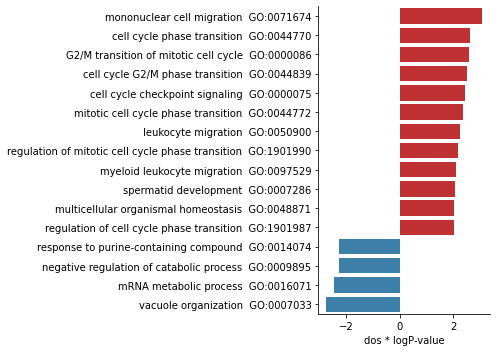

In [45]:
## Plot p-value DoS > 0 and DoS < 0
sns.set_palette(['#2b83ba', '#d7191c'])

fig, axes = plt.subplots(figsize=(7, 5))
# fig, axes = plt.subplots(figsize=(9, 4))
# fig, axes = plt.subplots(figsize=(3, 1.2))

sns.barplot(data=df, x='sign_logP', y='GOfull', hue='dos', dodge=False)
axes.set(xlabel='dos * logP-value', ylabel='')

fig.tight_layout()  
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)
axes.legend([], [], frameon=False)

pdf_name = 'MK_test_{}_ncbi/gsea_top_terms.result.pdf'.format(db)
# fig.savefig(pdf_name, bbox_inches='tight')

In [178]:
## GO Enrichment from clusterProfiler
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'
dos = 'pos'
# dos = 'neg'

file_name = '{}.enrichGO.3clades.tsv'.format(dos)
file_data = glob(dir_path + file_name)[0]
df = pd.read_csv(file_data, sep='\t')

df['GOfull'] = df['Description'] + '  ' + df['ID']
df['logpval'] = - np.log10(df['pvalue'])
df['ngenes'], df['nset'] = df['GeneRatio'].str.split('/').str
df['ratio'] = (pd.to_numeric(df['ngenes']) / pd.to_numeric(df['nset']) * 1000).astype(int)
df.head()

/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  if sys.path[0] == '':


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,db,GOfull,logpval,ngenes,nset,ratio
0,GO:0009798,axis specification,4/73,76/11829,0.001225,0.658192,0.658192,NOTCH2/MNS1/TASOR/GPC3,4,vidMac,axis specification GO:0009798,2.911968,4,73,54
1,GO:0034113,heterotypic cell-cell adhesion,3/73,40/11829,0.001891,0.658192,0.658192,CD2/FGA/WNK1,3,vidMac,heterotypic cell-cell adhesion GO:0034113,2.723256,3,73,41
2,GO:0006959,humoral immune response,4/73,89/11829,0.002195,0.658192,0.658192,FGA/NOTCH2/CFH/PDCD1,4,vidMac,humoral immune response GO:0006959,2.658645,4,73,54
3,GO:0044782,cilium organization,7/73,305/11829,0.002689,0.658192,0.658192,DZIP1/PCM1/POC1B/BBS10/CDC14A/MNS1/ODF2,7,vidMac,cilium organization GO:0044782,2.570483,7,73,95
4,GO:0033044,regulation of chromosome organization,5/73,166/11829,0.003569,0.658192,0.658192,NDC80/LIG4/DLGAP5/TASOR/RTEL1,5,vidMac,regulation of chromosome organization GO:0033044,2.447444,5,73,68


(11, 15)
(21, 15)
(19, 15)


/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


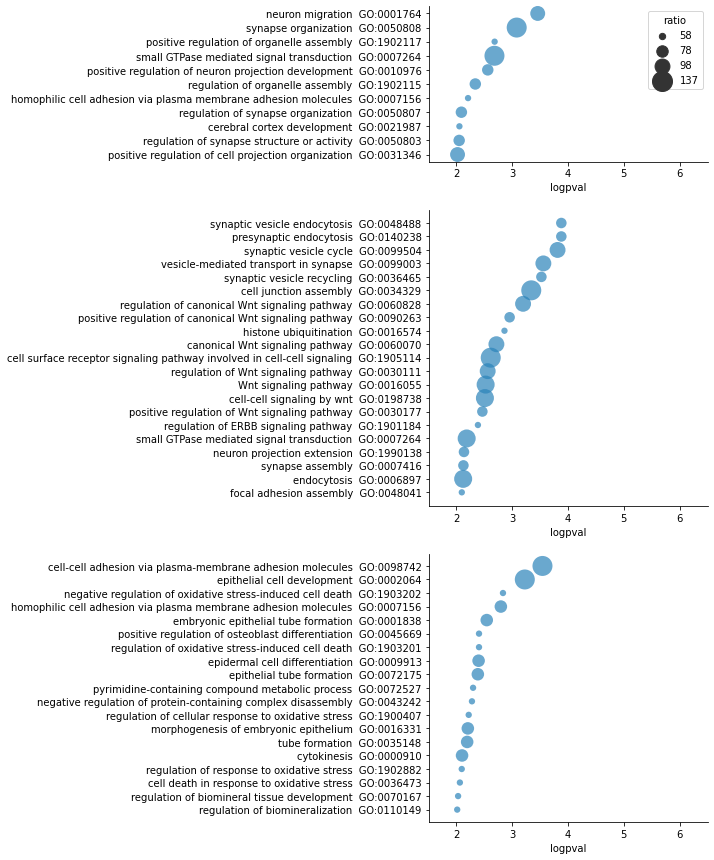

In [176]:
## Plot log p-value 
blue = '#2b83ba'
red = '#d7191c'

if dos == 'pos':
    c = red
    db_ratios = [12, 19, 7]
elif dos == 'neg':
    c = blue
    db_ratios = [11, 21, 19]
    

fig, axes = plt.subplots(3, 1, gridspec_kw={'height_ratios': db_ratios}, figsize=(5, 15))

dbs = ['vidMac', 'vidCha', 'indInd']
for i in range(len(dbs)):
    db = dbs[i]
    axi = axes[i]
    dfi = df[df['db'] == db]
    print(dfi.shape)
    sns.scatterplot(ax=axi, data=dfi, x='logpval', y='GOfull', size='ratio', sizes=(40,400),
                    color=c, alpha=0.7, linewidth=0)
    axi.set(xlim=(1.5, 6.5), ylabel='')
    if i != 0:
        axi.legend([], [], frameon=False)
    
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)
fig.tight_layout() 

pdf_name = '{}.enrichGO.3clades.clusterProfiler.pdf'.format(dos)

# fig.savefig(pdf_name, bbox_inches='tight')